In [1]:
# Importing prerequisites
import numpy as np
from matplotlib import pyplot as plt
import mylibrary as ml

In [2]:
# Setting space and time units for simulations
m_per_km = 1e3
m_per_pc = 3.086e16
s_per_myr = 1e6*365*24*3600

In [90]:
# Setting values for constants, resolutions
eta_T = 0.7                                       # just a typical magnetic diffusivity
h = 5.0                                           # value for thickness of universe
q = 0.98                                          # q value
Omega = (40*s_per_myr*m_per_km)/(1000*m_per_pc)   # constant for omega effect
t_max = 20                                        # time for which to run sinmulations
z_min = -1.0                                      # lower side of disc
z_max = 1.0                                       # upper side of disc
dt = 0.1                                          # time step size
dz = 0.01                                         # spatial step in z direction

In [91]:
# Setting up an alpha function (an odd function)
def alpha_func(z, alpha_0):
    alpha = alpha_0*np.sin((np.pi*(z/2)))
    return alpha

# Case for D $\sim$ -1

We proceed by setting D = -1 for the first seed field from Task 1 

In [92]:
alpha_0 = 0.5/h                                   # constant for alpha effect

D = - (alpha_0*q*Omega*h**3)/eta_T**2
print('Thus, value of dynamo number D is:')
print('D = ' + str(D))
print()
print('The other simulation constants are as follows:')
print('eta = ', eta_T, )
print('alpha_0 = ', alpha_0)
print('omega = ', Omega)
print('R_w = ', -q*Omega*h**2/eta_T)
print('R_a = ', alpha_0*h/eta_T)

Thus, value of dynamo number D is:
D = -1.0219053791315622

The other simulation constants are as follows:
eta =  0.7
alpha_0 =  0.1
omega =  0.04087621516526248
R_w =  -1.430667530784187
R_a =  0.7142857142857143


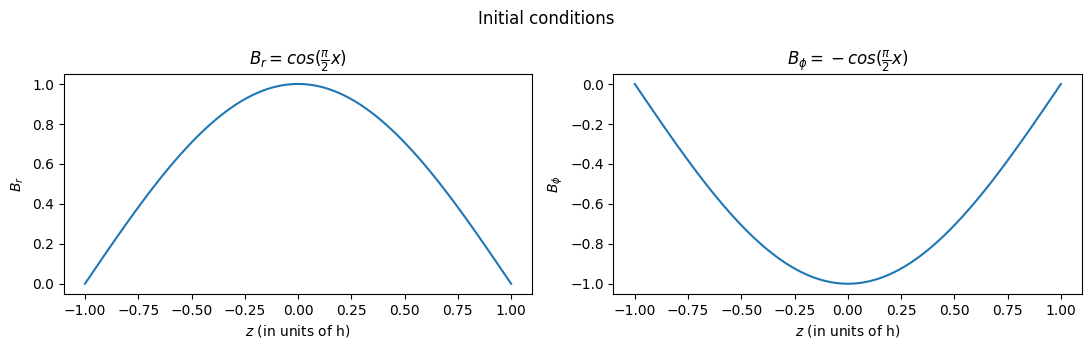

In [93]:
# simulations are performed in this normalised set of spatial coordinates

def init_cond_Br(z):
    return np.cos(np.pi/2*z)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*z)

def source_term(z, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [94]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
nu = eta_T*dt/(2*dz**2)
mu = dt/(2*dz)
alpha = alpha_func(z, alpha_0)
alpha_dot = np.gradient(alpha, z)

A = ml.mod_matrix_A(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)
B = ml.mod_matrix_B(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)

# Solve the diffusion equation in radial direction
solution = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]

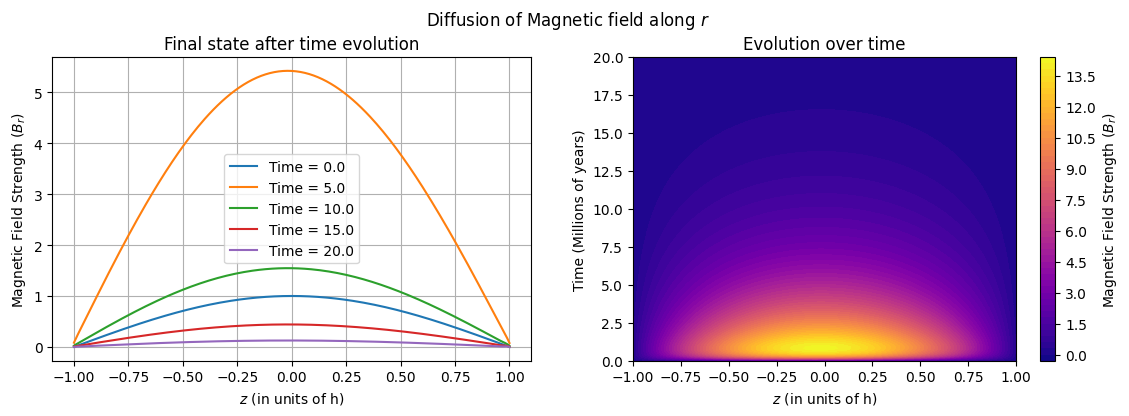

In [95]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'Time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

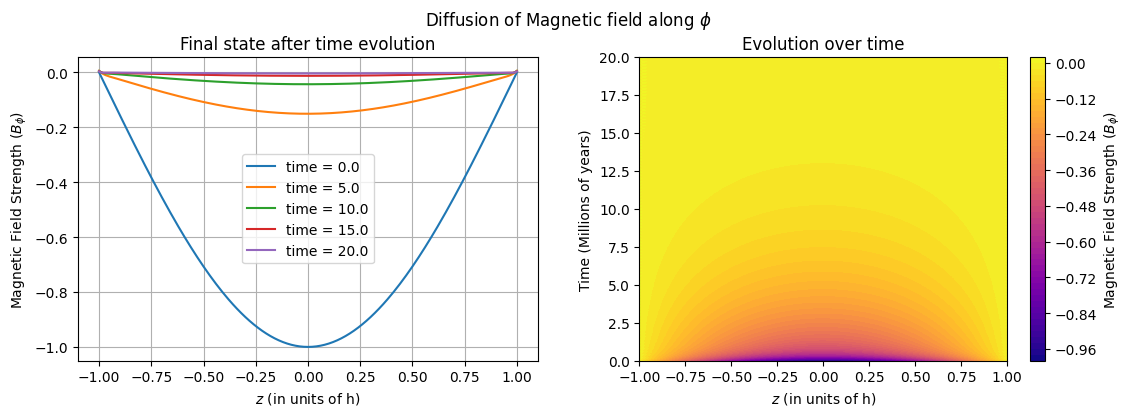

In [96]:
plt.figure(figsize=(12, 8))

# Final state plot
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Evolution plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

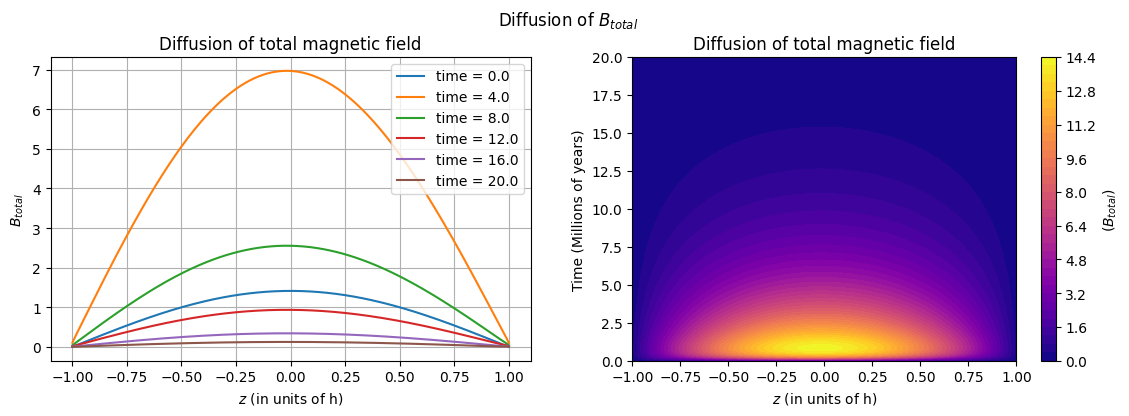

In [97]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot for total magnetic field
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Plot for pitch angle
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title('Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of ' + r'$B_{total}$')

plt.show()

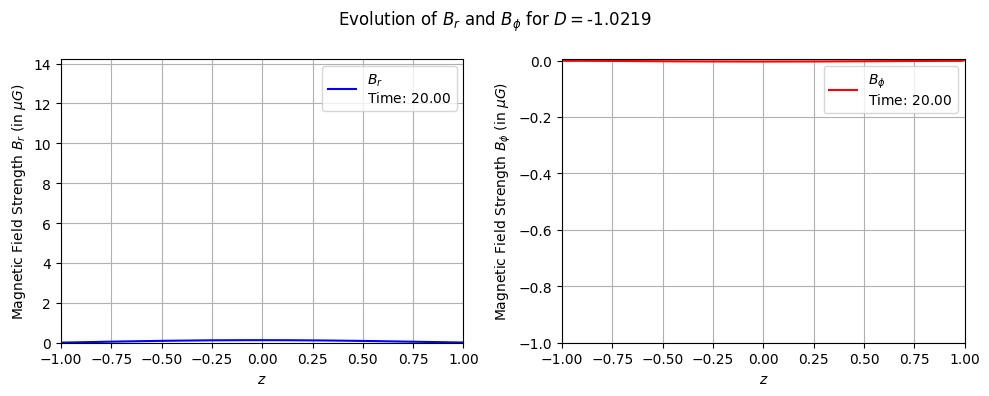

In [31]:
import matplotlib.animation as animation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

line_br, = ax1.plot([], [], color='blue', label='$B_r$ (in $\mu G$)')
line_bphi, = ax2.plot([], [], color='red', label='$B_{\phi}$ (in $\mu G$)')

fig.suptitle(r'Evolution of $B_r$ and $B_{\phi}$ for $D = $'+str(np.round(-alpha_0*q*Omega*h**3/eta_T**2, 4)))

# Set the axis limits
ax1.set_xlim(z_min, z_max)
ax1.set_ylim(np.min(B_r), np.max(B_r))
ax1.set_xlabel('$z$')
ax1.set_ylabel('Magnetic Field Strength $B_r$ (in $\mu G$)')
ax1.grid()

ax2.set_xlim(z_min, z_max)
ax2.set_ylim(np.min(B_phi), np.max(B_phi))
ax2.set_xlabel('$z$')
ax2.set_ylabel('Magnetic Field Strength $B_{\phi}$ (in $\mu G$)')
ax2.grid()

# Create the update function for the animation
def update(frame):
    # Clear the previous lines
    line_br.set_data(z, B_r[:, frame])
    line_bphi.set_data(z, B_phi[:, frame])
    
    # Set the legend with changing time and LaTeX form
    ax1.legend([r'$B_r$'+f'\nTime: ${t[frame]:.2f}$'])
    ax2.legend([r'$B_{\phi}$'+f'\nTime: ${t[frame]:.2f}$'])
    #print(frame)
    #ax1.set_ylim(B_r[frame].max())
    #ax1.set_ylim(0, max(B_r[frame]))
    #ax2.set_ylim(B_phi[frame].min())
    #ax2.set_ylim(0, max(B_phi[frame]))
    
    return line_br, line_bphi

# Create the animation
animation = animation.FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# Set tight layout
plt.tight_layout()

# Display the animation
animation.save('D1.gif', writer='pillow')

plt.show()

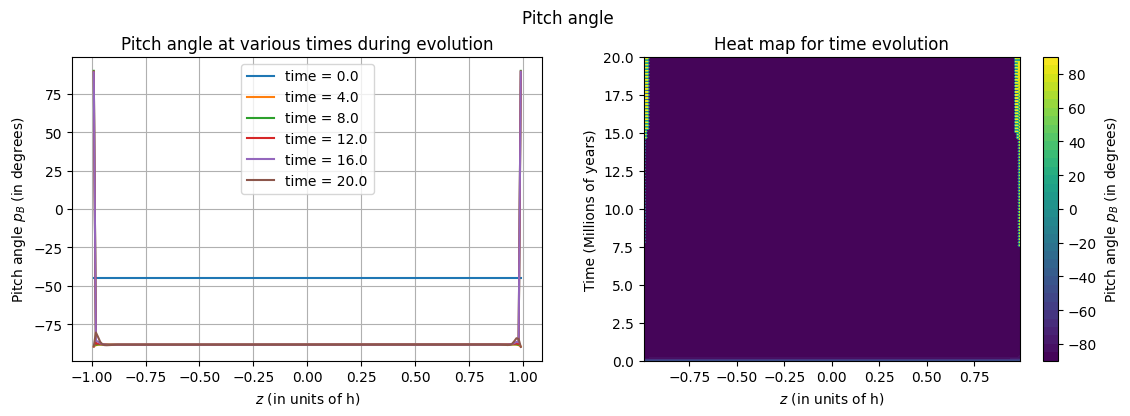

In [98]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Pitch angle at various times during evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Heat map for time evolution')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Pitch angle')
plt.show()

Global growth rate = -0.251


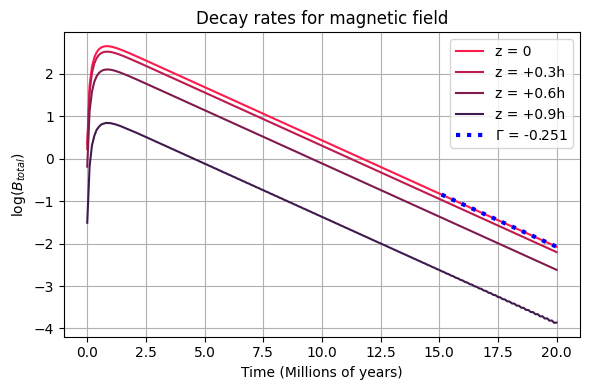

In [99]:
# Decay plots for magnetic field
B_mid = np.log(B_total[int(len(z)/2), :])
B_3 = np.log(B_total[int((13/20)*len(z)), :])
B_6 = np.log(B_total[int((16/20)*len(z)), :])
B_9 = np.log(B_total[int((19/20)*len(z)), :])

# Produce growth rate using last 5% of B_mid
fit_frac = 0.1
fit_len = int(len(t)*fit_frac)
m, c = np.polyfit(t[-fit_len:], B_mid[-fit_len:], 1)

print('Global growth rate = ' + '%.3f'%m)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, c=(1.0, 0.1, 0.3), label='z = 0')
plt.plot(t, B_3, c=(0.75, 0.1, 0.3), label='z = +0.3h')
plt.plot(t, B_6, c=(0.5, 0.1, 0.3), label='z = +0.6h')
plt.plot(t, B_9, c=(0.25, 0.1, 0.3), label='z = +0.9h')

# Plot best fit line for B_mid
plt.plot(t[-fit_len:], m*t[-fit_len:] + c, 'b:', linewidth=3, label=r'$\Gamma$ = ' + '%.3f'%m)
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$')
plt.title(r'Decay rates for magnetic field')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

# Case for D $\sim$ -20

Now, we run our simulations by setting D = -20

In [100]:
alpha_0 = 10.0/h                                   # constant for alpha effect

D = - (alpha_0*q*Omega*h**3)/eta_T**2
print('Thus, value of dynamo number D is:')
print('D = ' + str(D))
print()
print('The other simulation constants are as follows:')
print('eta = ', eta_T, )
print('alpha_0 = ', alpha_0)
print('omega = ', Omega)
print('R_w = ', -q*Omega*h**2/eta_T)
print('R_a = ', alpha_0*h/eta_T)

Thus, value of dynamo number D is:
D = -20.438107582631243

The other simulation constants are as follows:
eta =  0.7
alpha_0 =  2.0
omega =  0.04087621516526248
R_w =  -1.430667530784187
R_a =  14.285714285714286


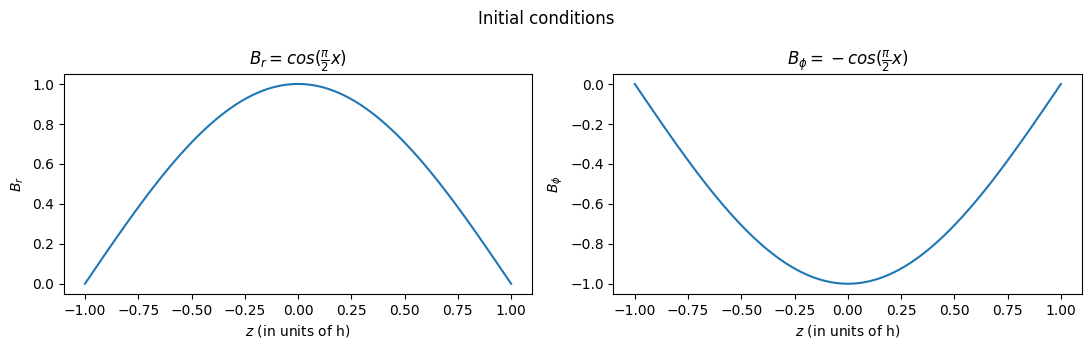

In [101]:
# simulations are performed in this normalised set of spatial coordinates

def init_cond_Br(z):
    return np.cos(np.pi/2*z)

def init_cond_Bphi(z):
    return -np.cos(np.pi/2*z)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [102]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
nu = eta_T*dt/(2*dz**2)
mu = dt/(2*dz)
alpha = alpha_func(z, alpha_0)
alpha_dot = np.gradient(alpha, z)

A = ml.mod_matrix_A(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)
B = ml.mod_matrix_B(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

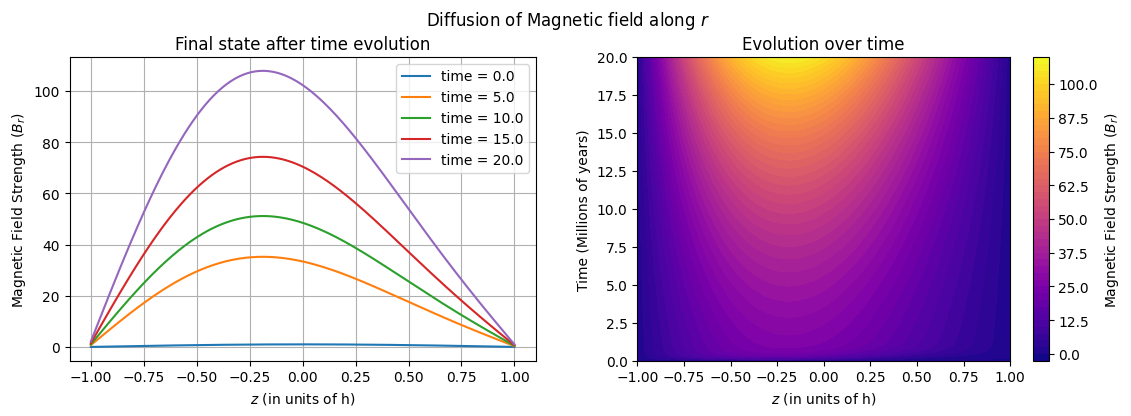

In [103]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

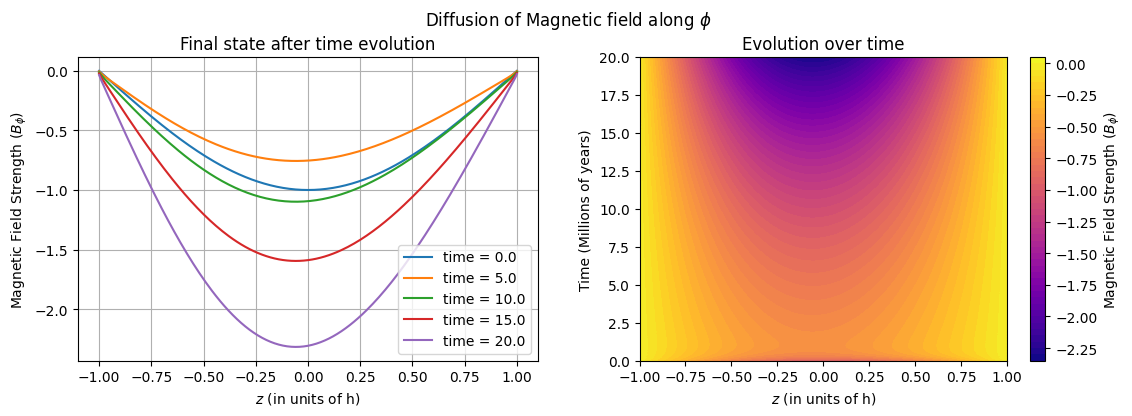

In [104]:
plt.figure(figsize=(12, 8))

# Final state plot
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Evolution plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

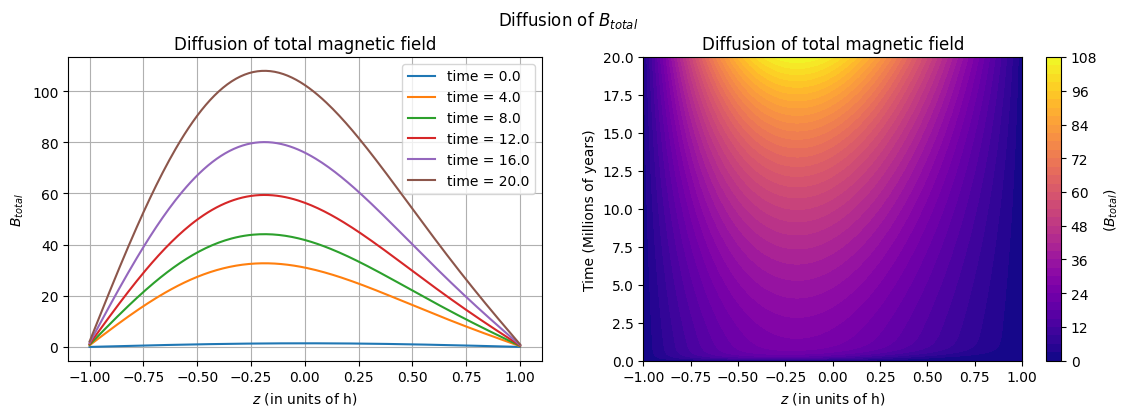

In [105]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot for total magnetic field
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Plot for pitch angle
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title('Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of ' + r'$B_{total}$')

plt.show()

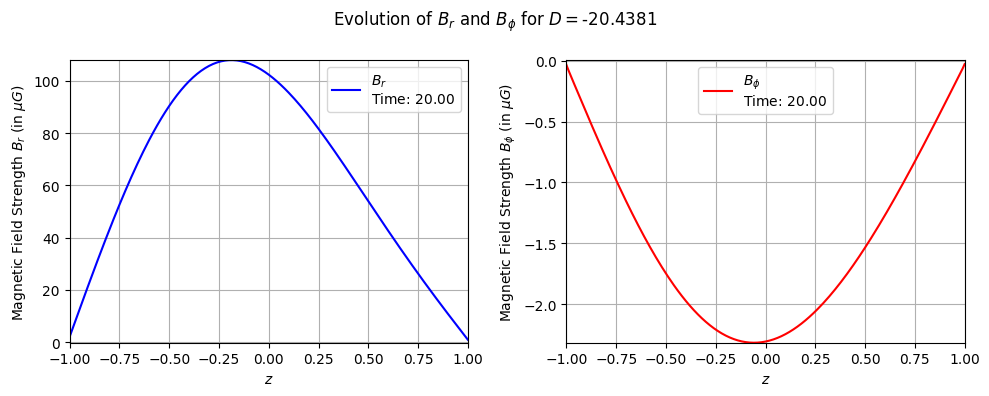

In [38]:
import matplotlib.animation as animation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

line_br, = ax1.plot([], [], color='blue', label='$B_r$ (in $\mu G$)')
line_bphi, = ax2.plot([], [], color='red', label='$B_{\phi}$ (in $\mu G$)')

fig.suptitle(r'Evolution of $B_r$ and $B_{\phi}$ for $D = $'+str(np.round(-alpha_0*q*Omega*h**3/eta_T**2, 4)))

# Set the axis limits
ax1.set_xlim(z_min, z_max)
ax1.set_ylim(np.min(B_r), np.max(B_r))
ax1.set_xlabel('$z$')
ax1.set_ylabel('Magnetic Field Strength $B_r$ (in $\mu G$)')
ax1.grid()

ax2.set_xlim(z_min, z_max)
ax2.set_ylim(np.min(B_phi), np.max(B_phi))
ax2.set_xlabel('$z$')
ax2.set_ylabel('Magnetic Field Strength $B_{\phi}$ (in $\mu G$)')
ax2.grid()

# Create the update function for the animation
def update(frame):
    # Clear the previous lines
    line_br.set_data(z, B_r[:, frame])
    line_bphi.set_data(z, B_phi[:, frame])
    
    # Set the legend with changing time and LaTeX form
    ax1.legend([r'$B_r$'+f'\nTime: ${t[frame]:.2f}$'])
    ax2.legend([r'$B_{\phi}$'+f'\nTime: ${t[frame]:.2f}$'])
    #print(frame)
    #ax1.set_ylim(B_r[frame].max())
    #ax1.set_ylim(min(B_r[frame]), max(B_r[frame]))
    #ax2.set_ylim(B_phi[frame].min())
    #ax2.set_ylim(min(B_phi[frame]), max(B_phi[frame]))
    
    return line_br, line_bphi

# Create the animation
animation = animation.FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# Set tight layout
plt.tight_layout()

# Display the animation
animation.save('ani_1.gif', writer='pillow')

plt.show()

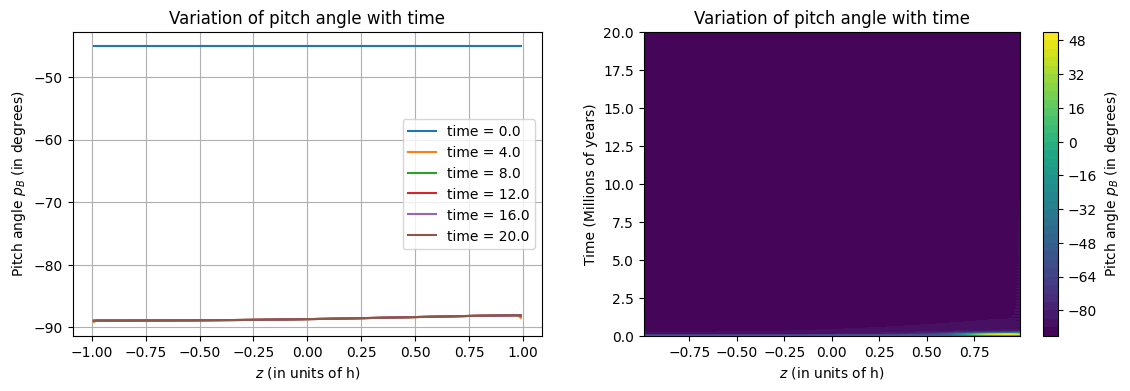

In [106]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

Global growth rate = 0.075


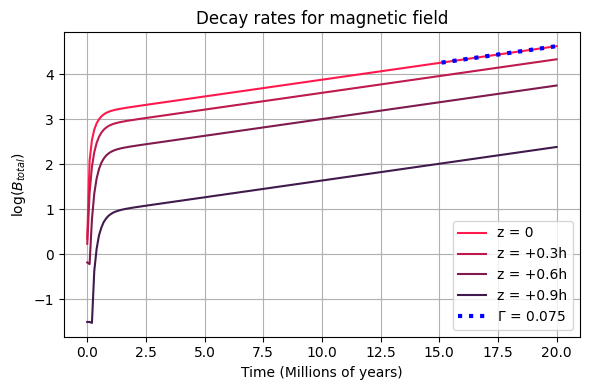

In [107]:
# Decay plots for magnetic field
B_mid = np.log(B_total[int(len(z)/2), :])
B_3 = np.log(B_total[int((13/20)*len(z)), :])
B_6 = np.log(B_total[int((16/20)*len(z)), :])
B_9 = np.log(B_total[int((19/20)*len(z)), :])

# Produce growth rate using last 5% of B_mid
fit_frac = 0.1
fit_len = int(len(t)*fit_frac)
m, c = np.polyfit(t[-fit_len:], B_mid[-fit_len:], 1)

print('Global growth rate = ' + '%.3f'%m)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, c=(1.0, 0.1, 0.3), label='z = 0')
plt.plot(t, B_3, c=(0.75, 0.1, 0.3), label='z = +0.3h')
plt.plot(t, B_6, c=(0.5, 0.1, 0.3), label='z = +0.6h')
plt.plot(t, B_9, c=(0.25, 0.1, 0.3), label='z = +0.9h')

# Plot best fit line for B_mid
plt.plot(t[-fit_len:], m*t[-fit_len:] + c, 'b:', linewidth=3, label=r'$\Gamma$ = ' + '%.3f'%m)
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$')
plt.title(r'Decay rates for magnetic field')
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

# Critical dynamo number finder

Wherein, the critical dynamo number is found using the Bisection method. This is a root-finding method that works when the root is known to lie between two limits (or a 'bracket'). From the above two simulations, we found that $D_c$ must lie between $D=-1$ and $D=-20$. So, we proceed to use our formulation of the Bisection method to find $D_c$ to a precision of 3 digits after the decimal point.

Here, we use the same set of initial conditions as before.

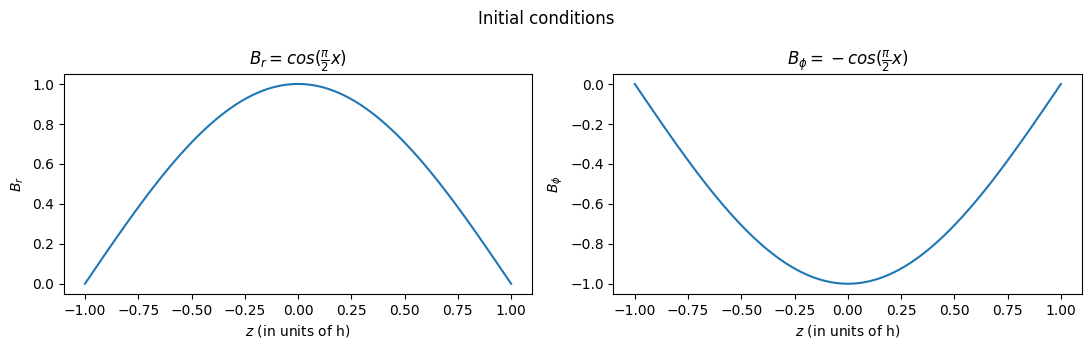

In [109]:
def init_cond_Br(z):
    return np.cos(np.pi/2*z)

def init_cond_Bphi(z):
    return -np.cos(np.pi/2*z)

def source_term(z, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [110]:
def growth_rate(a_0):
    z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
    t = np.linspace(0, t_max, int(t_max / dt) + 1)

    # Coefficients for the matrix A and B
    nu = eta_T*dt/(2*dz**2)
    mu = dt/(2*dz)
    alpha = alpha_func(z, a_0)
    alpha_dot = np.gradient(alpha, z)

    A = ml.mod_matrix_A(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)
    B = ml.mod_matrix_B(z, nu, mu, q, Omega, alpha, alpha_dot, dz, dt)

    # Solve the diffusion equation in radial direction
    soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)
    B_r = soln[:len(z), :]
    B_phi = soln[len(z):, :]

    B_total, pitch = ml.BP_calc(B_r, B_phi)

    B_mid = np.log(B_total[int(len(z)/2), :])

    # Produce growth rate using last 5% of B_mid
    fit_frac = 0.05
    fit_len = int(len(t)*fit_frac)
    m, c = np.polyfit(t[-fit_len:], B_mid[-fit_len:], 1)

    return m

In [111]:
a_critical, iteration_no, growth_rate_list, abs_err = ml.bisection(growth_rate, 0.1, 2.0, 1e-4)

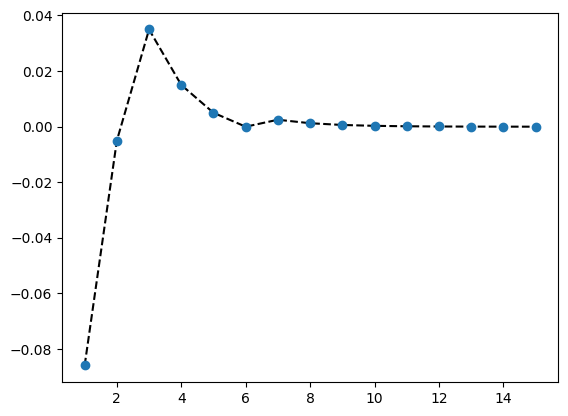

In [113]:
plt.plot(iteration_no, growth_rate_list, 'k--', zorder=0)
plt.scatter(iteration_no, growth_rate_list, zorder=1)

In [115]:
D_critical = - (a_critical*q*Omega*h**3)/eta_T**2
print('Thus, the critical dynamo number is')
print('D = ' + str(D_critical))

Thus, the critical dynamo number is
D = -15.888027726653641


Hence, from our simulations, we find that the Critical dynamo number ($D_c$) is -15.888